In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

In [5]:
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)
print("테스트 세트 정확도: {:.3f}\n".format(forest.score(X_test, y_test)))

cvscores = cross_val_score(forest, X, y, cv=5)
print("테스트 세트 정확도 CV = 5: {:.3f}\n".format(cvscores.mean()))

cvscores = cross_val_score(forest, X, y, cv=10)
print("테스트 세트 정확도 CV = 5: {:.3f}\n".format(cvscores.mean()))

테스트 세트 정확도: 0.920

테스트 세트 정확도 CV = 5: 0.860

테스트 세트 정확도 CV = 5: 0.840



In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
dt = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0)
dt.fit(X_train, y_train)
print("테스트 세트 정확도: {:.3f}\n".format(dt.score(X_test, y_test)))

cvscores = cross_val_score(forest, X, y, cv=5)
print("테스트 세트 정확도 CV = 5: {:.3f}\n".format(cvscores.mean()))

cvscores = cross_val_score(forest, X, y, cv=10)
print("테스트 세트 정확도 CV = 5: {:.3f}\n".format(cvscores.mean()))

테스트 세트 정확도: 0.880

테스트 세트 정확도 CV = 5: 0.860

테스트 세트 정확도 CV = 5: 0.840



훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972
테스트 세트 정확도 CV = 10: 0.910

[1.  1.  0.8 0.9 1.  1.  0.7 1.  0.9 0.8]


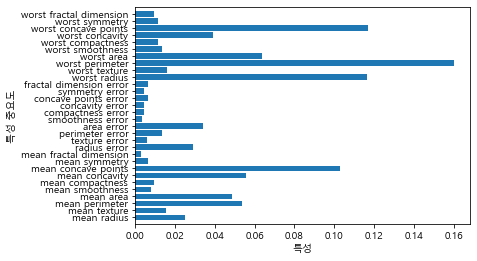

In [20]:
from matplotlib import font_manager, rc
from sklearn.datasets import load_breast_cancer
import mglearn
import matplotlib.pyplot as plt
import numpy as np

cancer = load_breast_cancer()

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

cvscores = cross_val_score(forest, X, y, cv=10)
print("테스트 세트 정확도 CV = 10: {:.3f}\n".format(cvscores.mean()))
print(cvscores)

# 선형모델이나 단일 결정트리보다 높은 성능
# 단일 결정트리처럼 max-features 매개변수 조정, 사전가지치기 가능
# 기본 설정으로 좋은 성능
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성")
    plt.ylabel("특성 중요도")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(forest)